## **About Dataset**

This dataset has been obtained from stackoverflow.com 2021 developer survey. This dataset has around 84,000 entries and is a great dataset to deal with for Data enthusatics like me and yourself! 

This dataset has 2 files, one for the data itself, named `survey_df` and the schema file showing the meaning of the columns in the main dataset, named `schema_df`.

## **About Notebook**
This notebook is divided into 2 sections and 1 bonus section. The first 2 sections are **Data Cleaning** and **Data Visualiztation** respectively. And the **Bonus Section**, that's a surprise, and I'm sure you'll love it! So stay tuned!

## **About ME**
I'm Muhammad Anas, a 13 year old machine learning maniac & enthusiastic. This is my 13th EDA/Data Analysis Project, and I'm proud to say I enjoyed this project very very much. This was a real life dataset, which needed A LOT of cleaning and really made me grasp the important conceps of Data Cleaning and Wrangling!

This is the Github Repo: https://github.com/muhammadanas0716/Data-Science-Projects---EDA

I hope you enjoy the project 😎

In [1]:
# Import needed libraries 
# Importing the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve 
print("Imported Needed Libraries 😅")

# Set Pandas Settings
pd.set_option('display.max_colwidth', None)

# Get the data
URL_1 = "https://raw.githubusercontent.com/muhammadanas0716/Data-Science-Projects---EDA/main/14.%20StackOverFlow%20Survey%202021%20-%20Analysis/survey_results_public.csv"
URL_2 = "https://raw.githubusercontent.com/muhammadanas0716/Data-Science-Projects---EDA/main/14.%20StackOverFlow%20Survey%202021%20-%20Analysis/survey_results_schema.csv"
survey_df = pd.read_csv(URL_1)
schema_df = pd.read_csv(URL_2)
print("Data Imported Successfully 🚀")

Imported Needed Libraries 😅
Data Imported Successfully 🚀


## **Section 1 - Data Exploration**

Within this section, I have explored the data, cleaned the data and made it more effecient to further visualize in the next section. There are also filter systems in this section, which I find very cool, so be sure to check em out!

This is has been done via Pandas


In [2]:
# Get forst 5 rows of data from survey_df
survey_df.head(3)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-employed",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",18 - 24 years,"Coding Bootcamp;Other online resources (ex: videos, blogs, etc)",NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc);School",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write code sometimes as part of my work","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc);Online Forum",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN


In [3]:
# Get first 5 rows of schema df
schema_df.head()

,qname,question
0,S0,"<div><span style=""font-size:19px;""><strong>Hello world! </strong></span></div>\n\n<div> </div>\n\n<div>Thank you for taking the 2021 Stack Overflow Developer Survey, the longest running survey of software developers (and anyone else who codes!) on Earth. </div>\n\n<div> </div>\n\n<div>As in previous years, anonymized results of the survey will be made publicly available under the Open Database License, where anyone can download and analyze the data. On that note, throughout the survey, certain answers you and your peers give will be treated as personally identifiable information, and therefore kept out of the anonymized results file. We'll call out each of those in the survey with a note saying ""This information will be kept private."" </div>\n\n<div> </div>\n\n<div>There are six sections in this survey. The 2nd, 3rd, and 4th sections will appear in a random order.</div><div><br></div>\n\n<div> 1. Basic Information</div>\n\n<div> 2. Education, Work, and Career</div>\n\n<div> 3. Technology and Tech Culture</div>\n\n<div> 4. Stack Overflow Usage + Community</div>\n\n<div> 5. Demographic Information </div>\n\n<div> 6. Final Questions</div>\n\n<div> \n<div>Most questions in this survey are optional. Required questions are marked with *. This anonymous survey will take about 10 minutes to complete. We encourage you to complete it in one sitting.</div><div><br></div>\n</div>\n\n<div><strong>If you use security or ad-blocking plugins, you may see error messages</strong></div>\n\n<div>Our third-party software provider, Qualtrics, does not work well with certain ad blockers and security software. To avoid error messages that prevent you from taking the survey, please try specifically unblocking Qualtrics in your plugin or pausing the plugin while you take the survey. </div>\n\n<div> </div>\n\n<div>To begin, click <strong>Next.</strong></div>"
1,MetaInfo,Browser Meta Info
2,S1,"<span style=""font-size:22px; font-family: arial,helvetica,sans-serif; font-weight: 700;"">Basic Information</span><br>\n<br>\n<p><span style=""font-size:16px; font-family:arial,helvetica,sans-serif;"">The first section will focus on some basic information about who you are.<br>\n<br>\nMost questions in this section are required. Required questions are noted with *.</span></p>"
3,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."" <b>*</b>"
4,Employment,Which of the following best describes your current <b>employment status</b>?


In [4]:
# Cleaning up schema df and doing some fun with it - look below

# 1. Adding Groupby, so I can access the colmun name in survey_df (qname), which then should show me the question if I need to find out meaning. Look below
def get_question(column_name):
  qname_grp = schema_df.groupby("qname")
  print(pd.DataFrame(qname_grp.get_group(column_name)["question"]))

# 2. Test it out
get_question("MainBranch")

                                                                                                                    question
3  Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code." <b>*</b>


In [5]:
# Get column names for survey df
survey_df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [6]:
# Get shape of dataset
survey_df.shape

(83439, 48)

In [7]:
# Get info on the dataset
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [8]:
# Get description of the dataset
survey_df.describe()

,ResponseId,CompTotal,ConvertedCompYearly
count,83439.000000,4.718300e+04,4.684400e+04
mean,41720.000000,2.119407e+69,1.184262e+05
std,24086.908893,4.603702e+71,5.272944e+05
min,1.000000,0.000000e+00,1.000000e+00
25%,20860.500000,1.600000e+04,2.702500e+04
50%,41720.000000,6.700000e+04,5.621100e+04
75%,62579.500000,1.400000e+05,1.000000e+05
max,83439.000000,1.000000e+74,4.524131e+07


In [9]:
# Get dtypes for the survey df dataset
survey_df.dtypes

ResponseId                        int64
MainBranch                       object
Employment                       object
Country                          object
US_State                         object
UK_Country                       object
EdLevel                          object
Age1stCode                       object
LearnCode                        object
YearsCode                        object
YearsCodePro                     object
DevType                          object
OrgSize                          object
Currency                         object
CompTotal                       float64
CompFreq                         object
LanguageHaveWorkedWith           object
LanguageWantToWorkWith           object
DatabaseHaveWorkedWith           object
DatabaseWantToWorkWith           object
PlatformHaveWorkedWith           object
PlatformWantToWorkWith           object
WebframeHaveWorkedWith           object
WebframeWantToWorkWith           object
MiscTechHaveWorkedWith           object


In [10]:
# Get all NAN values
def missing_values_table(df):
  # Get Missing Values and Missing Values Perecenatage
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * mis_val / len(df)

    # Get them in a table and do some changes
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Missing Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Missing Values', ascending=False).round(1)
    
    # Show some info of the dataset and missing values
    print(f"💡 Your selected dataset has {df.shape[1]} columns")
    print(f"💡 Of {df.shape[1]} columns, there are {str(mis_val_table_ren_columns.shape[0])} missing columns")
    
    # Retunr the missing values column DataFrame
    return mis_val_table_ren_columns

# Show Missing Values
missing_values_table(survey_df)

💡 Your selected dataset has 48 columns
💡 Of 48 columns, there are 45 missing columns


,Missing Values,% of Total Missing Values
UK_Country,79021,94.7
US_State,68519,82.1
MiscTechWantToWorkWith,45418,54.4
PlatformWantToWorkWith,41820,50.1
ConvertedCompYearly,36595,43.9
MiscTechHaveWorkedWith,36384,43.6
CompTotal,36256,43.5
WebframeWantToWorkWith,31344,37.6
PlatformHaveWorkedWith,31304,37.5
CompFreq,31289,37.5


In [11]:
# Deleting the needed items - 50%+ will be DELETED
columns_to_be_deleted = ["UK_Country", "US_State", "MiscTechWantToWorkWith", "PlatformWantToWorkWith"]
survey_df.drop(columns_to_be_deleted, axis = 1, inplace = True) 

print("Columns Removed Successfully 🚀")

Columns Removed Successfully 🚀


In [12]:
survey_df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'EdLevel',
       'Age1stCode', 'LearnCode', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'Currency', 'CompTotal', 'CompFreq',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [13]:
# Remove all NAN values. Not good practice but it should do the work for now. Anyways, my computer is lagging cuz of the huge dataset
survey_df.dropna(inplace=True)

In [14]:
# Check for missing values
missing_values_table(survey_df)

💡 Your selected dataset has 44 columns
💡 Of 44 columns, there are 0 missing columns


,Missing Values,% of Total Missing Values


In [15]:
# Check shape of dataset NOW
survey_df.shape # From 83,400 to 9600

# Note: This is perfectly fine, I wasnt expecting this number but 9600 data entreis is MORE than enough for EDA. 
# Otherwise, my computer would've died 😅
# We did the absolute right thing. EDA should never be done on such a huge dataset as a whole.
# If you don't wish to remove data, then use .sample() to get a sample and then do the EDA on that sample. 
# Saves time and gives you the insight you need

(9615, 44)

In [16]:
# Convert all floats to ints
survey_df["CompTotal"] = survey_df["CompTotal"].astype(int)
survey_df["ConvertedCompYearly"] = survey_df["ConvertedCompYearly"].astype(int)

In [17]:
# Get the salaries of a specific country
country_grp = survey_df.groupby("Country")

def get_salary(country):
  return f"The avergae salary in Oman is ${country_grp['CompTotal'].agg(['median', 'mean']).loc[country][1]:.0f} and the mean is ${country_grp['CompTotal'].agg(['median', 'mean']).loc[country][0]:.0f}"
  
get_salary("Oman")

'The avergae salary in Oman is $3100 and the mean is $2500'

## **Section 2 - Data Visualiztation - Here comes! My most favourite part of the Data Analysis journey! Let's get graphy!**

**NOTE**: This dataset was mainly for data cleaning and data wrangling purposes - not much for data visualization. So I won't be doing very cool charts and stuff - Basic Charts like Bar Graphs should do. For advanced and more fun grahs you could refer to my other notebooks, which contain a lot of complex graphs. 

This was mainly focused on Data Analysis with Pandas. 

But wait, towards the end of this notebook - there is a filter system - which you HAVE to check out! It demos both the use of Data Analysis/Filtering/Cleaning and Data Visualization! An awesome way to show what you got!

**Be sure to check it out 😎**

`Visaluzations done via matplotlib and seaborn`

In [18]:
# Change Matplotlib Settings to show max rows and columns
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 10_000)

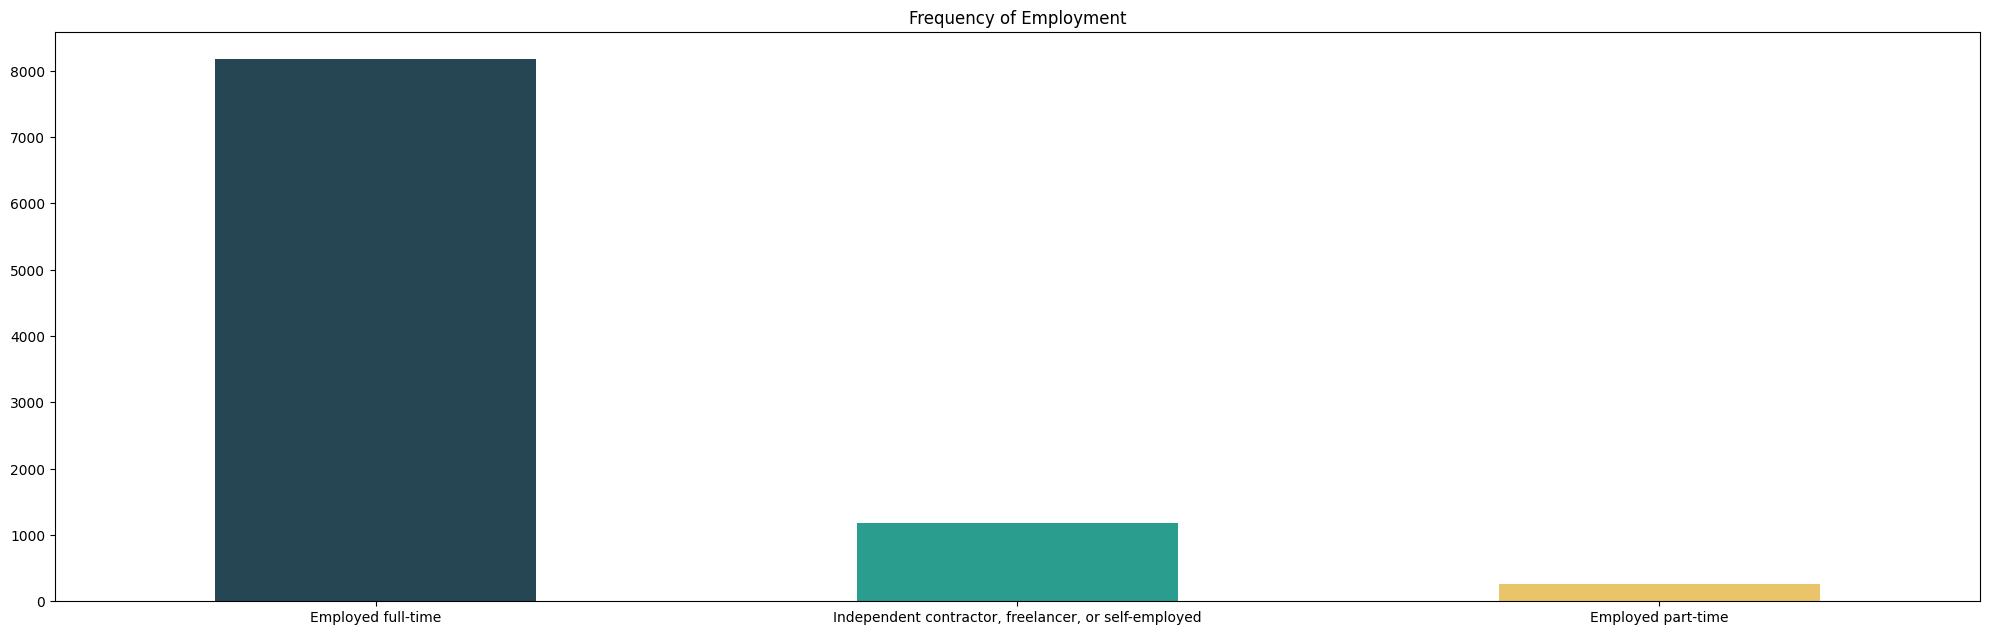

In [19]:
# Frequency of Employment

# Set Figure Size
plt.figure(figsize=(20,10), dpi=100)

# Set Title
plt.title("Frequency of Employment")

# Plot
survey_df["Employment"].value_counts().plot(kind="bar", color=["#264653", "#2a9d8f", "#e9c46a"])

# Show
plt.tight_layout()
plt.xticks(rotation=360)
plt.show()

# Analysis - We obeserve around 80%+ of the devs were employed full-time and a handful self-employed and part-time

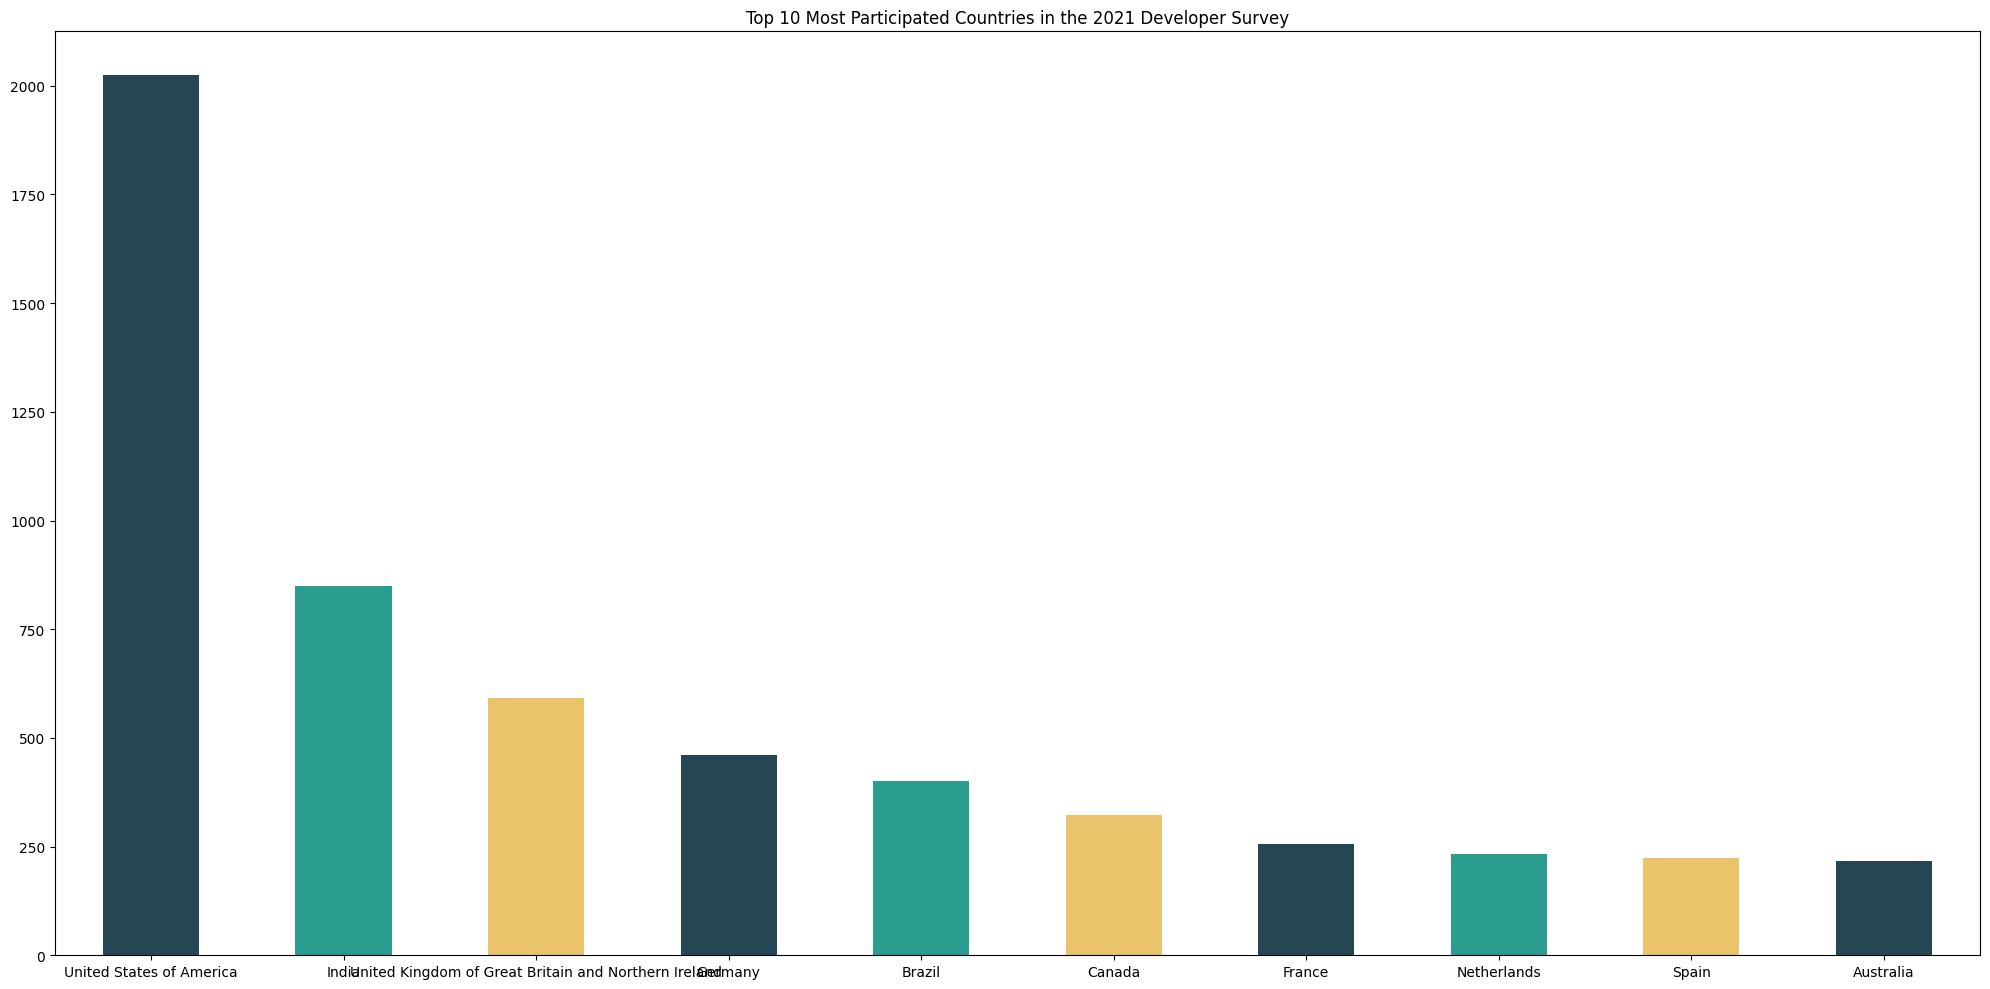

In [20]:
# Top 10 Most Participated Countries in the Developer Survey
# I won't be doing the top 10 least countries, as they are all equal, meaning the graph is a straight line. You could do that by chaning **nlargest** to
# **nsmallest**

# Set Figure Size
plt.figure(figsize=(20,10), dpi=100)

# Set Title
plt.title("Top 10 Most Participated Countries in the 2021 Developer Survey")

# Plot
survey_df["Country"].value_counts().nlargest(10).plot(kind="bar", color=["#264653", "#2a9d8f", "#e9c46a"])

# Show
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

# Analysis - Around 20% (2000) devs took this Survey from the USA followed by India and the UK

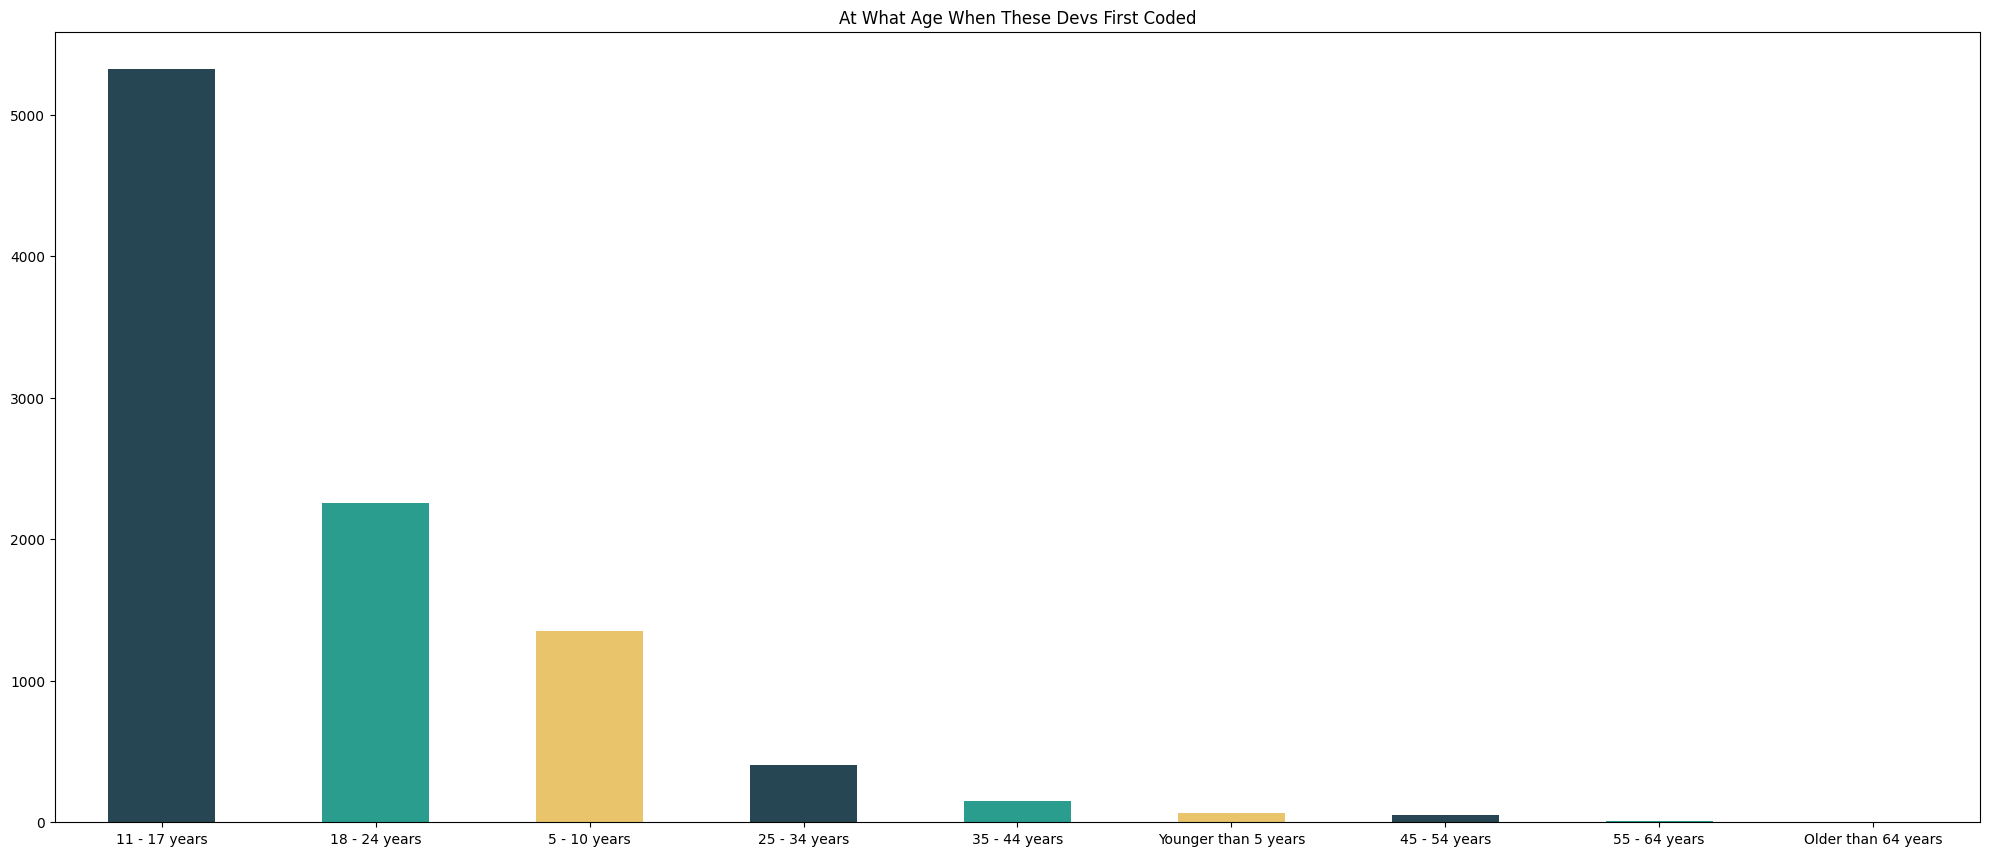

In [21]:
# At What Age When These Devs First Coded
# Set Figure Size
plt.figure(figsize=(20,10), dpi=100)

# Set Title
plt.title("At What Age When These Devs First Coded")

# Plot
survey_df["Age1stCode"].value_counts().plot(kind="bar", color=["#264653", "#2a9d8f", "#e9c46a"])

# Show
plt.tight_layout()
plt.xticks(rotation=360)
plt.show()

# Analysis - Most of the devs coded their first line of code when they were of ages between 11-17, followed by 18-24.

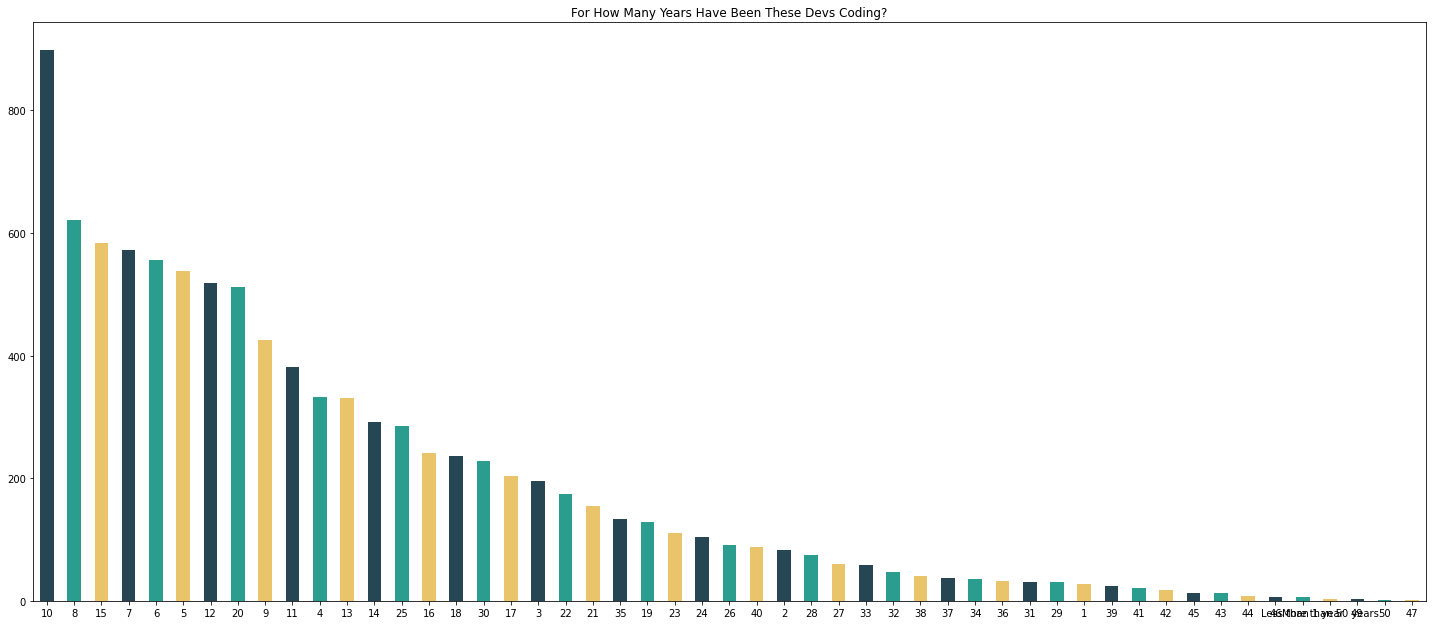

In [22]:
# For How Many Years Have Been These Devs Coding?
# Set Figure Size
plt.figure(figsize=(20,10))

# Set Title
plt.title("For How Many Years Have Been These Devs Coding?")

# Plot
survey_df["YearsCode"].value_counts().plot(kind="bar", color=["#264653", "#2a9d8f", "#e9c46a"])

# Show
plt.tight_layout()
plt.xticks(rotation=360)
plt.show()

# Analysis - Most of the devs who took this survey had around 10 years of experience followed by 8, 15, 7, 6 and 5 years of coding

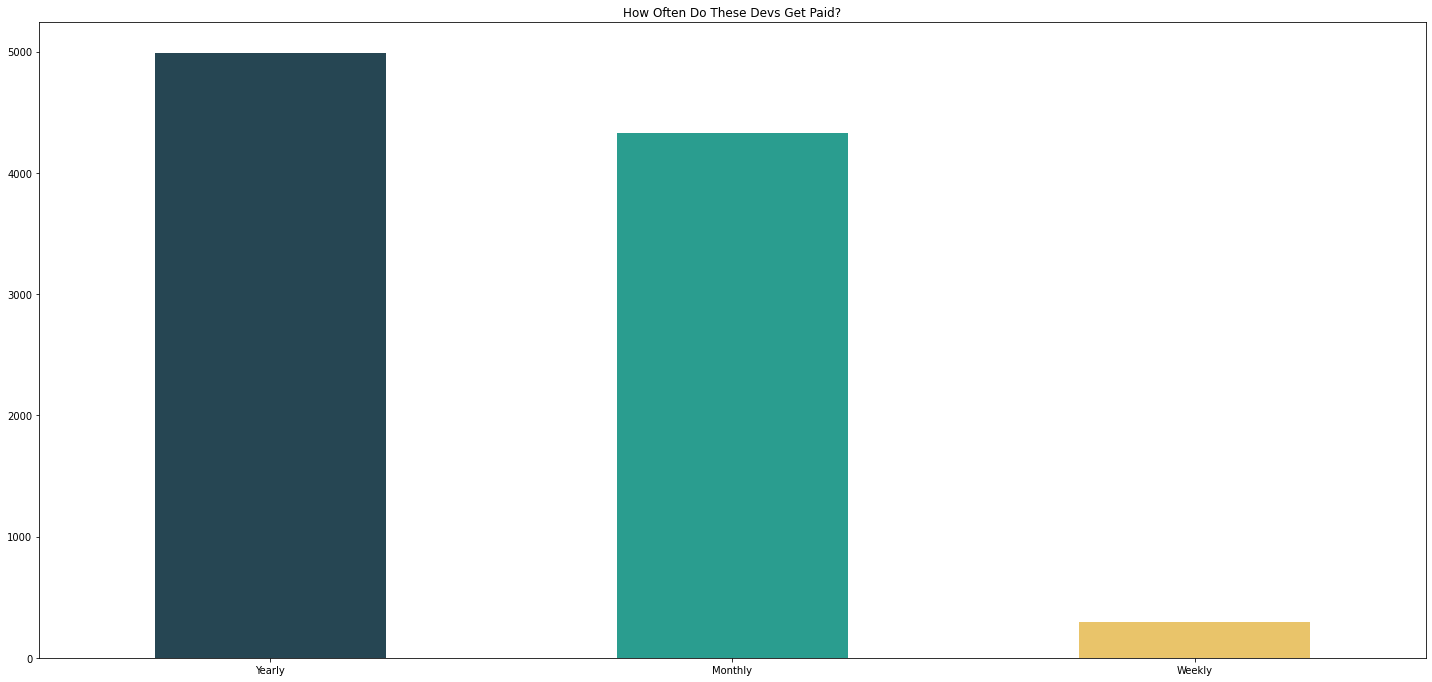

In [23]:
# How Often Do These Devs Get Paid?
# Set Figure Size
plt.figure(figsize=(20,10))

# Set Title
plt.title("How Often Do These Devs Get Paid?")

# Plot
survey_df["CompFreq"].value_counts().plot(kind="bar", color=["#264653", "#2a9d8f", "#e9c46a"])

# Show
plt.tight_layout()
plt.xticks(rotation=360)
plt.show()

# Analysis - We obserbe that around 5000 devs get paid yearly and arund 4300 devs get paid monthy and maybe 200-400 get paid weekly

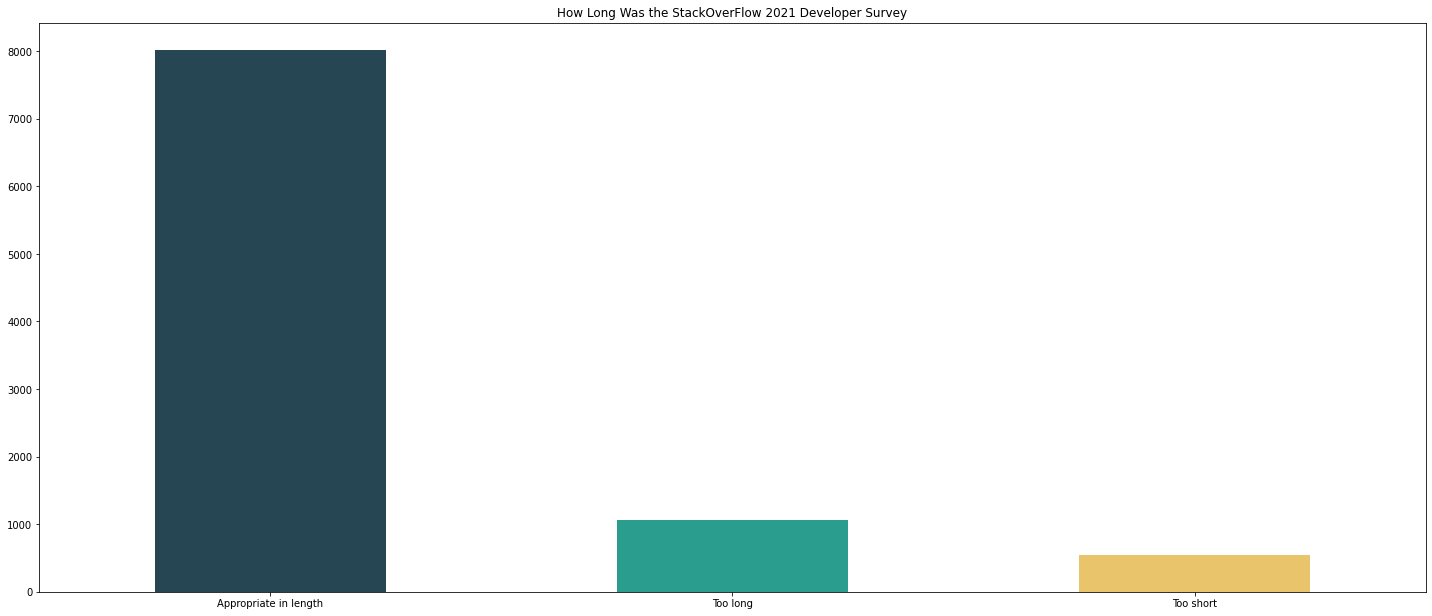

In [24]:
# How Long Was the StackOverFlow 2021 Developer Survey

# Set Figure Size
plt.figure(figsize=(20,10))

# Set Title
plt.title("How Long Was the StackOverFlow 2021 Developer Survey")

# Plot
survey_df["SurveyLength"].value_counts().plot(kind="bar", color=["#264653", "#2a9d8f", "#e9c46a"])

# Show
plt.tight_layout()
plt.xticks(rotation=360)
plt.show()

# Analysis, we can the SurveyLength was fine around 8000+ devs

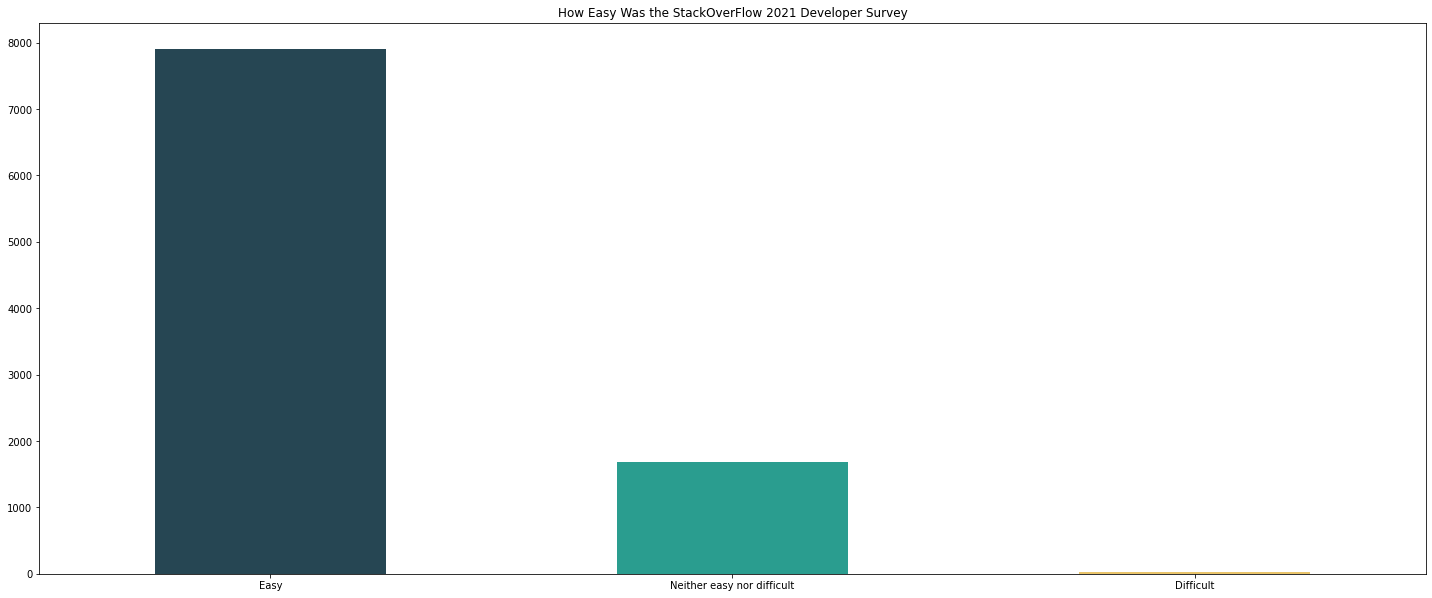

In [25]:
# How Easy Was the StackOverFlow 2021 Developer Survey

# Set Figure Size
plt.figure(figsize=(20,10))

# Set Title
plt.title("How Easy Was the StackOverFlow 2021 Developer Survey")

# Plot
survey_df["SurveyEase"].value_counts().plot(kind="bar", color=["#264653", "#2a9d8f", "#e9c46a"])

# Show
plt.tight_layout()
plt.xticks(rotation=360)
plt.show()

# Analysis, we can the Survey was easy for around 7800 devs and medium for around 1700 devs and difficult for around 10 poeple 🤣

## **⤵️ Bonus: FILTER SYSTEM BELOW ⤵️**

🚀 I was waiting for this part for so long. This is an example of how you could merge Data Analysis and Data Visualization to output maginificent results! 


🚀 This Filter System has Filters, which have filters within them. 


🚀 The first one filters through the whole dataset, outputting the most used tool in the top 5 countries within that useability!


🚀 The second one is filtering system that filters through the whole datatset, and return the values of the following columns - in other words the columns
which state what the devs out there are using! This is country-specified.

**Note**: You have to choose one single column and single country and one single tool. I have listed the columns which you could use below, but for the countries and tools you'll have to find out yourself, consider this an excersize. 

If you want a hint, here it is. Try doing `survey_df["Country"].value_counts().index.tolist()` to get the **countries' names**. To get the data in the provided columns change **Country** to the requried column. Like this:
`survey_df["DatabaseHaveWorkedWith"].value_counts().index.tolist()`

#### **🐍 COLUMN LIST 🐍**
1. LanguageHaveWorkedWith
2. DatabaseHaveWorkedWith
3. PlatforomHaveWorkedWith
4. WebframeHaveWorkedWith
5. MiscTechHaveWorkedWith
6. ToolsTechHaveWorkedWith
7. NEWCollabToolsHaveWorkedWith


In [26]:
# Which top 5 countries knows a specific programming language the most?

# Create Country Group
country_grp = survey_df.groupby("Country")
specific_countries_input_column = "NEWCollabToolsHaveWorkedWith"  # ⬆️⬆️⬆️ ONE OF THE ABOVE ⬆️⬆️⬆️

tool = ".Net" # Inputted Tool - Make sure this is present in the column you mentioned above ⬆️

# Check if tool is C++, (tool with symbols). This is so because Regex doesn't allow `+` symbols
if tool == "C++":
  tool = "C\+\+"

# Get Those Country entries and sum them, with the user-specified-langauge
country_uses_language = country_grp[specific_countries_input_column].apply(lambda x: x.str.contains(tool).sum())
country_uses_language.head()

country_respondents = survey_df['Country'].value_counts()
country_respondents

# Concat into a DataFrame
tool_df = pd.concat([country_respondents, country_uses_language], axis=1, sort=False)

# Percentage Using a Specific language
tool_df[f'Percentage Uses {tool}'] = (tool_df[specific_countries_input_column] / tool_df['Country']) * 100

# Change Column Names
language_df = tool_df.rename(columns={
    "Country" : "Total Number of Respondents", 
    specific_countries_input_column : f"Have Worked with {tool}",
    
})

# Show
language_df.nlargest(5, columns=[f'Have Worked with {tool}', f"Total Number of Respondents"])

# Note:
# These are shown via Percentage Ratios, so please swap the places of the above line to see results from Have worked with the tool prespective as shown:
# language_df.nlargest(5, columns=[f"Total Number of Respondents", f"Percentage Knowing {tool}'])

,Total Number of Respondents,Have Worked with .Net,Percentage Uses .Net
India,850,112,13.176471
United States of America,2024,54,2.667984
Brazil,400,39,9.750000
Italy,213,34,15.962441
Pakistan,91,26,28.571429


Out of a total of 91 devs in Pakistan, 83 devs use Visual Studio Code
############ ⤵️⤵️ PIE CHART ⤵️⤵️ ############


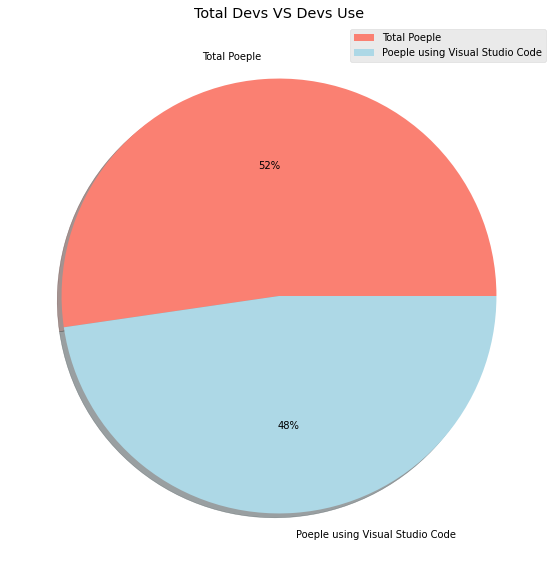

In [27]:
# Below is a filtering System  Below you can change the country name and tool name.
# Also, everything should be one at a time!

# 🐍 COLUMN LIST 🐍
# 1. LanguageHaveWorkedWith
# 2. DatabaseHaveWorkedWith
# 3. PlatformHaveWorkedWith
# 4. WebframeHaveWorkedWith
# 5. MiscTechHaveWorkedWith
# 6. ToolsTechHaveWorkedWith
# 7. NEWCollabToolsHaveWorkedWith

specific_countries_input_column = "NEWCollabToolsHaveWorkedWith"  # ⬆️⬆️⬆️ ONE OF THE ABOVE ⬆️⬆️⬆️
country = "Pakistan"
tool = "Visual Studio Code"

def get_programming_language_users(tool, country):
  global country_respondents, country_uses_specified_language
  country_respondents = survey_df['Country'].value_counts()
  country_uses_specified_language = country_grp[specific_countries_input_column].apply(lambda x: x.str.contains(tool).sum())
  return f"Out of a total of {country_respondents[country]} devs in {country}, {country_uses_specified_language[country]} devs use {tool}"

# Print it out
print(get_programming_language_users(tool, country))
print("############ ⤵️⤵️ PIE CHART ⤵️⤵️ ############")

# Chart it out - PIE CHART

# Create Needed Variables
total_devs = country_respondents[country]
devs_knowing = country_uses_specified_language[country]

# Styles
plt.style.use("ggplot")

# Labels
labels = [f"Total Poeple", f'Poeple using {tool}']

# Create DataFrame
devs_comparison_df = (pd.DataFrame(
    {"devs_comparison_df" : [total_devs, devs_knowing]})).reset_index()

# Plot DataFrame
devs_comparison_df.plot.pie(y="devs_comparison_df", figsize=(10, 10), colors=["Salmon", "Lightblue"], autopct='%.0f%%', shadow=True, labels=labels).set(
    title="Total Devs VS Devs Use")

# Some axis stuff
plt.legend(labels=labels, loc="best")
plt.axis('off')
plt.show()

Thank you for reading. I hope you enjoy it. And Don’t forget to follow me on 
[Hashnode](https://hashnode.com/@muhammadanas0716) | [GitHub](https://github.com/muhammadanas365) | [Medium](https://medium.com/@muhammadanas0716) | [Twitter](https://twitter.com/Muhamma63227121) | [Kaggle](https://www.kaggle.com/muhammadanas0716) | [LinkedIn](https://www.linkedin.com/in/muhammad-anas-63744b235/)👍

***This is Muhammad Anas, and I'll catch you next time***